# Tariffazione con i GLM
## Statistica Assicurativa
### _Leonardo Stincone, 10/02/2020_

In [1]:
/* Percorso in cui si trovano i dati */
libname dati '/folders/myfolders/data';

/* Parametri grafici */
ods graphics on / width = 10cm height = 8cm;

/* Carico il dataset con le polizze */
data polizze;
    set dati.polizze;
run;

data polizze;
    set polizze;
    freqsin = nsin / espo;
run;

/* Creo un dataset con le sole polizze sinistrate */
data polizze_sin;
    set polizze;
    where nsin > 0;
    dannomedio = dannotot / nsin;
run;

proc print data = polizze (obs=10) round;
run;

SAS Connection established. Subprocess id is 2476



## 1) Analisi preliminari

In [2]:
proc means data = polizze nway noprint;
    var espo nsin dannotot;
    output out = polizzeMeans sum = totespo totnsin totdannotot;
run;

data polizzeMeans;
    set polizzeMeans;
    
    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed=0;
    totqd = totdannotot / totespo;
    
    drop _TYPE_;
    rename _FREQ_ = totnpol;
    
    format totfreqsin 5.3;
    format totespo 10.2;
    format totdannotot 10.2;
    format totqd 10.2;
run;

proc print data = polizzeMeans noobs round;
    var totfreqsin totdannomed totqd totespo;
run;

In [3]:
proc means data = polizze maxdec = 2;
    var eta potf potkil massa;
    weight espo;
run;

### `1. Sesso`

In [4]:
proc means data = polizze nway noprint;
    class sesso;
    var espo nsin dannotot;
    output out = polizzebysesso sum = totespo totnsin totdannotot;
run;

data polizzebysesso;
    set polizzebysesso;
    
    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed=0;
    totqd = totdannotot / totespo;
    
    drop _TYPE_;
    rename _FREQ_ = totnpol;
    
    format totfreqsin 5.3;
    format totespo 10.2;
    format totdannotot 10.2;
    format totqd 10.2;
run;

proc print data = polizzebysesso noobs;
    var sesso totfreqsin totdannomed totqd totespo;
run;


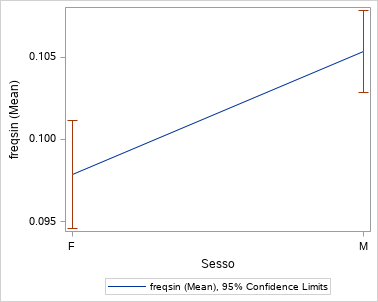

In [5]:
proc sgplot data=polizze;
    vline sesso / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
run;


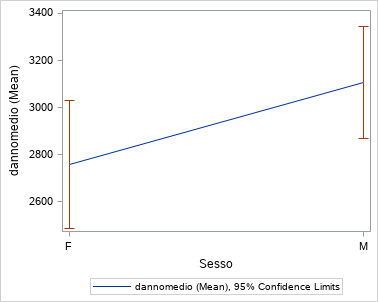

In [6]:
proc sgplot data=polizze_sin;
    vline sesso / response=dannomedio weight=nsin stat=mean limitstat=clm alpha = .05;
run;

### `2. Capoluogo`

In [7]:
proc means data = polizze nway noprint;
    class capoluogo;
    var espo nsin dannotot;
    output out = polizzebycapoluogo sum = totespo totnsin totdannotot;
run;

data polizzebycapoluogo;
    set polizzebycapoluogo;
    
    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed=0;
    totqd = totdannotot / totespo;
    
    drop _TYPE_;
    rename _FREQ_ = totnpol;
    
    format totfreqsin 5.3;
    format totespo 10.2;
    format totdannotot 10.2;
    format totqd 10.2;
run;

proc print data=polizzebycapoluogo noobs;
    var capoluogo totfreqsin totdannomed totqd totespo;
run;


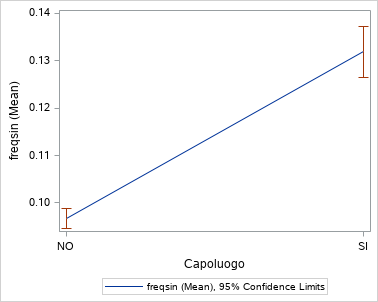

In [8]:
proc sgplot data=polizze;
    vline capoluogo / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
run;


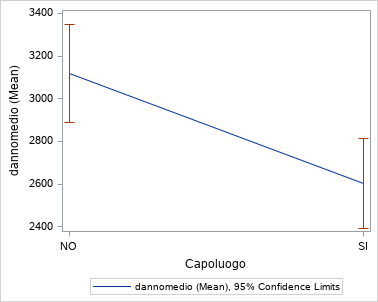

In [9]:
proc sgplot data=polizze_sin;
    vline capoluogo / response=dannomedio weight=nsin stat=mean limitstat=clm alpha = .05;
run;

### `3. Bendie`

In [10]:
proc means data = polizze nway noprint;
    class bendie;
    var espo nsin dannotot;
    output out=polizzebybendie sum=totespo totnsin totdannotot;
run;

data polizzebybendie;
    set polizzebybendie;
    
    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed=0;
    totqd = totdannotot / totespo;
    
    drop _TYPE_;
    rename _FREQ_ = totnpol;
    
    format totfreqsin 5.3;
    format totespo 10.2;
    format totdannotot 10.2;
    format totqd 10.2;
run;

proc print data = polizzebybendie noobs;
    var bendie totfreqsin totdannomed totqd totespo;
run;


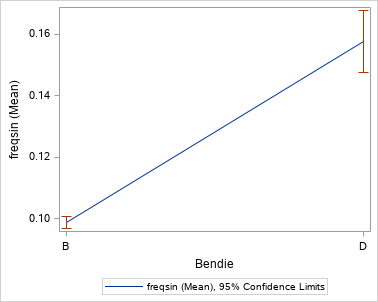

In [11]:
proc sgplot data=polizze;
    vline bendie / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
run;


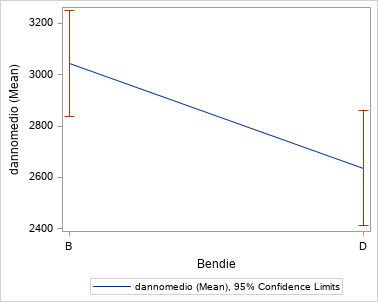

In [12]:
proc sgplot data=polizze_sin;
    vline bendie / response=dannomedio weight=nsin stat=mean limitstat=clm alpha = .05;
run;

### `4. Prov`

In [13]:
proc means data = polizze nway noprint;
    class prov;
    var espo nsin dannotot;
    output out = polizzebyprov sum = totespo totnsin totdannotot;
run;

data polizzebyprov;
    set polizzebyprov;
    
    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed=0;
    totqd = totdannotot / totespo;
    
    drop _TYPE_;
    rename _FREQ_ = totnpol;
    
    format totfreqsin 5.3;
    format totespo 10.2;
    format totdannotot 10.2;
    format totqd 10.2;
run;

proc sort data = polizzebyprov;
    by descending totfreqsin;
run;

proc print data = polizzebyprov (obs = 10);
    var prov totfreqsin totdannomed totqd totespo;
run;


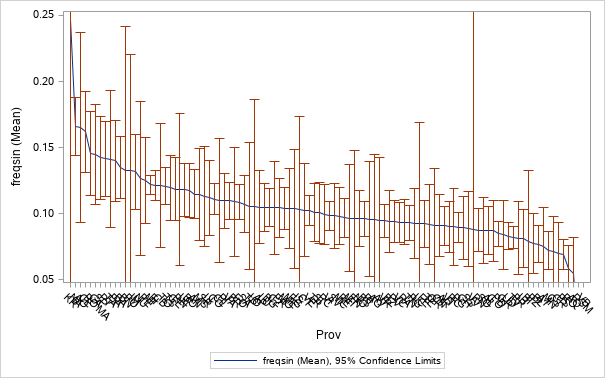

In [14]:
/* Parametri grafici */
ods graphics on / width = 16cm height = 10cm;

proc sgplot data=polizze;
    vline prov / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05
                 categoryorder=respdesc;
    yaxis min = 0.05 max = 0.25;
run;

### `5. eta`

In [15]:
proc means data = polizze nway noprint;
    class eta;
    var espo nsin dannotot;
    output out = polizzebyeta sum = totespo totnsin totdannotot;
run;

data polizzebyeta;
    set polizzebyeta;
    
    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed=0;
    totqd = totdannotot / totespo;
    
    drop _TYPE_;
    rename _FREQ_ = totnpol;
    
    format totfreqsin 5.3;
    format totespo 10.2;
    format totdannotot 10.2;
    format totqd 10.2;
run;

proc print data = polizzebyeta (obs=10) noobs;
    var eta totfreqsin totdannomed totqd totespo;
run;


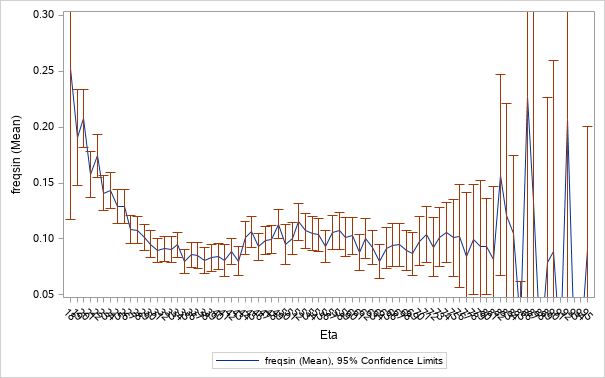

In [16]:
proc sgplot data=polizze;
    vline eta / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
    yaxis min = 0.05 max = 0.30;
run;


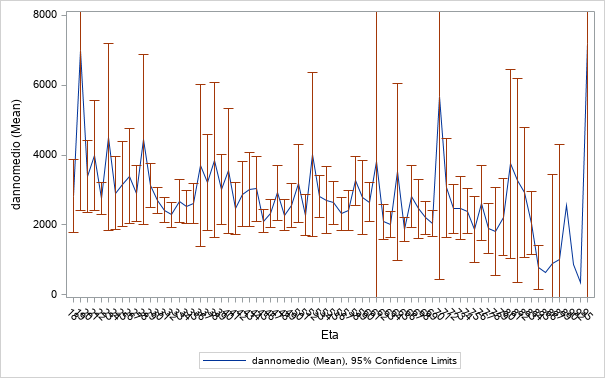

In [17]:
proc sgplot data=polizze_sin;
    vline eta / response=dannomedio weight=nsin stat=mean limitstat=clm alpha = .05;
    yaxis min = 0 max = 8000;
run;

## 2) Cluster Analysis

### `2.1. Prov`


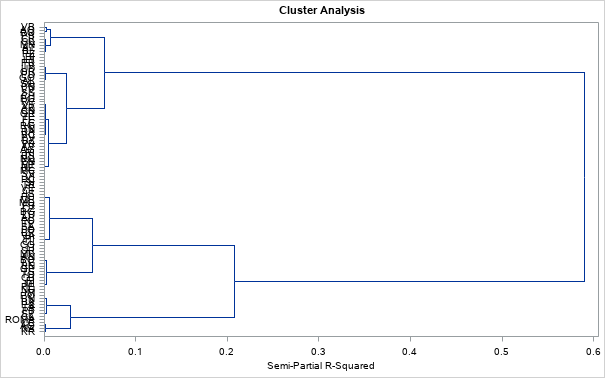

In [18]:
proc cluster method = ward data = polizzebyprov outtree = clusterprov print = 5;
    id prov;
    var totfreqsin;
    freq totespo;
    copy totespo totnsin totdannotot totdannomed;
run;

In [19]:
/* clusterprov contiene una riga per ogni passo della procedura di clustering */
proc print data = clusterprov (obs = 10);
run;

Con 12 cluster arrivo a $R^2 ≥ 0.99$

In [20]:
proc tree data = clusterprov nclusters = 12 out = prov12cl noprint;
    id prov;
    copy totespo totnsin totdannotot totfreqsin totdannomed;
run;

/* Assegno San Marino al cluster 12, che è quello con la frequenza sinistri più bassa */
data prov12cl;
  set prov12cl;
  if prov='RSM' then cluster=12;
run;

/* prov12cl contiene tante righe quante sono le province e indica di ogni provincia a quale cluster appartiene */
proc print data = prov12cl (obs = 10);
run;

In [21]:
/* polizzebyclusterprov contiene una riga per ogni cluster e indica di ogni cluster una serie di informazioni */
proc means data = prov12cl nway noprint;
    class cluster;
    var totespo totnsin totdannotot;
    output out = polizzebyclusterprov sum = totespocl totnsincl totdannototcl;
run;

data polizzebyclusterprov;
    set polizzebyclusterprov;
    
    totfreqsincl = totnsincl / totespocl;
    if totnsincl > 0 then totdannomedcl = totdannototcl / totnsincl;
        else totdannomedcl = 0;
    totqdcl = totdannototcl / totespocl;
    
    drop _type_;
    rename _FREQ_ = numprov;
    
    format totfreqsincl 5.3;
    format totespocl 10.2;
    format totdannototcl 10.2;
    format totqdcl 10.2;
run;

proc print data = polizzebyclusterprov;
run;

In [22]:
proc sort data = prov12cl;
    by cluster;
run;

/* Arricchisco il dataset prov12cl con le informazioni dei cluster a cui ogni provincia appartiene appartengono */
data prov12cl;
    merge prov12cl polizzebyclusterprov;
    by cluster;
run;

proc print data = prov12cl (obs = 10);
run;


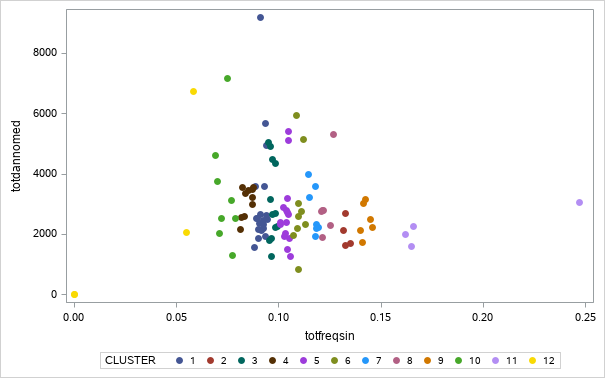

In [23]:
proc sgplot data = prov12cl;
    scatter x = totfreqsin y = totdannomed / group = cluster markerattrs=(symbol=CircleFilled);
run;

### `2.2. eta`

In [24]:
proc means data = polizze nway noprint;
    class eta;
    var espo nsin dannotot;
    output out = polizzebyeta sum = totespo totnsin totdannotot;
run;

data polizzebyeta;
    set polizzebyeta;
    
    totfreqsin = totnsin/totespo;
    if totnsin>0 then totdannomed = totdannotot/totnsin;
        else totdannomed = 0;
    totqd = totdannotot / totespo;
        
    drop _TYPE_;
    rename _FREQ_ = totnpol;
run;

proc print data = polizzebyeta (obs = 10) noobs;
    var eta totfreqsin totdannomed totqd totespo;
run;


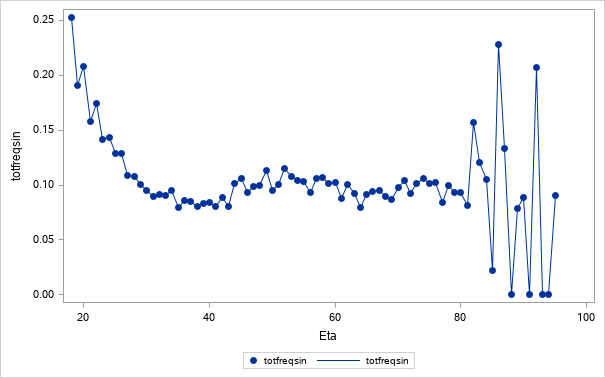

In [25]:
proc sgplot data = polizzebyeta;
    scatter x = eta y = totfreqsin / markerattrs=(symbol=CircleFilled);
    series x = eta y = totfreqsin;
run;

In [26]:
/* Preraggruppamento */
proc format;
    value formateta
        low-22 = "18-22"
        23-24 = "23-24"
        25-26 = "25-26"
        27-30 = "27-30"
        31-34 = "31-34"
        35-43 = "35-43"
        44-51 = "44-51"
        52-60 = "52-60"
        61-64 = "61-64"
        65-69 = "65-69"
        70-81 = "70-81"
        82-high = "82-";
run;

data polizzebyeta;
    set polizzebyeta;
    leveleta = eta;
    format leveleta formateta.;
run;

/* Calcolo le informazioni a livello di ogni gruppo */
proc means data = polizzebyeta nway noprint;
    class leveleta;
    var eta totfreqsin;
    weight totespo;
    output out = polizzebyleveleta1 mean = etamed totfreqsinmed;
run;

proc means data = polizzebyeta nway noprint;
    class leveleta;
    var totespo totnsin totdannotot totnpol;
    output out = polizzebyleveleta2 sum = totespo totnsin totdannotot totnpol;
run;

data polizzebyleveleta;
    merge polizzebyleveleta1 polizzebyleveleta2;
    by leveleta;
    drop _type_ _freq_;
run;

/* Standardizzo eta e freqsin in modo da poterle usare assieme per l'accorpamento */
proc standard data = polizzebyleveleta out = polizzebyleveletastd mean = 0 std = 1;
    weight totespo;
    var etamed totfreqsinmed;
run;

data polizzebyleveletastd;
    set polizzebyleveletastd;
    format etamed 8.4;
    format totfreqsinmed 8.4;
run;

data polizzebyleveletastd;
    set polizzebyleveletastd;
    rename totfreqsinmed = totfreqsinmedstd;
    rename etamed = etamedstd;
run;

data polizzebyleveleta;
    merge polizzebyleveleta polizzebyleveletastd;
    by leveleta;
run;

proc print data = polizzebyleveleta;
run;


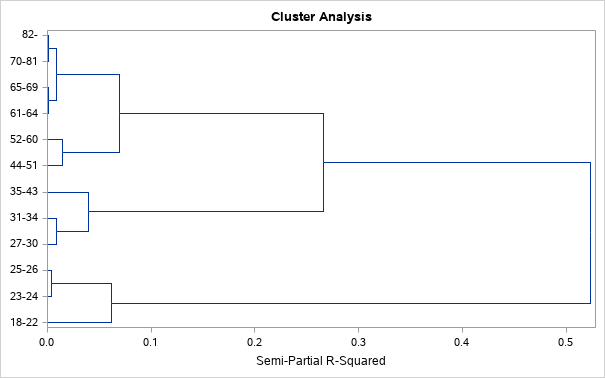

In [27]:
/* Effettuo il clustering usando sia etamedstd che totfreqsinmedstd */
proc cluster method = ward data = polizzebyleveleta outtree = clustereta;
    id leveleta;
    var etamedstd totfreqsinmedstd;
    freq totespo;
    copy totespo totnsin totdannotot etamed totfreqsinmed;
run;

Con 9 cluster arrivo a $R^2 ≥ 0.99$

In [28]:
proc tree data = clustereta nclusters = 9 out = cluster9eta noprint;
    id leveleta;
    copy totespo totnsin totdannotot etamed totfreqsinmed;
run;

/* cluster9eta contiene tante righe quanti erano i cluster nel preraggruppamento manuale */
proc print data = cluster9eta;
run;

In [29]:
/* polizzebyclustereta contiene una riga per ogni cluster e indica di ogni cluster una serie di informazioni */
proc means data = cluster9eta nway noprint;
    class cluster;
    var totespo totnsin totdannotot;
    output out = polizzebyclustereta sum = totespocl totnsincl totdannototcl;
run;

data polizzebyclustereta;
    set polizzebyclustereta;
    
    totfreqsincl = totnsincl/totespocl;
    if totnsincl>0 then totdannomedcl = totdannototcl/totnsincl;
        else totdannomedcl = 0;
    totqdcl = totdannototcl / totespocl;
    
    drop _type_;
    
    format totfreqsincl 5.3;
    format totespocl 10.2;
    format totdannototcl 10.2;
    format totqdcl 10.2;
run;

proc print data = polizzebyclustereta;
run;

In [30]:
proc sort data = cluster9eta;
    by cluster;
run;

/* Arricchisco il dataset cluster9eta con le informazioni dei cluster a cui ogni gruppo appartiene appartengono */
data cluster9eta;
    merge cluster9eta polizzebyclustereta;
    by cluster;
run;

proc print data = cluster9eta;
run;

### `2.3 potf`

In [31]:
proc means data = polizze nway noprint;
    class potf;
    var espo nsin dannotot;
    output out=polizzebypotf sum=totespo totnsin totdannotot;
run;

data polizzebypotf;
    set polizzebypotf;
    
    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed = 0;
    totqd = totdannotot / totespo;
        
    drop _TYPE_;
    rename _FREQ_ = totnpol;
run;

proc print data = polizzebypotf (obs = 10) noobs;
    var potf totfreqsin totdannomed totqd totespo;
run;


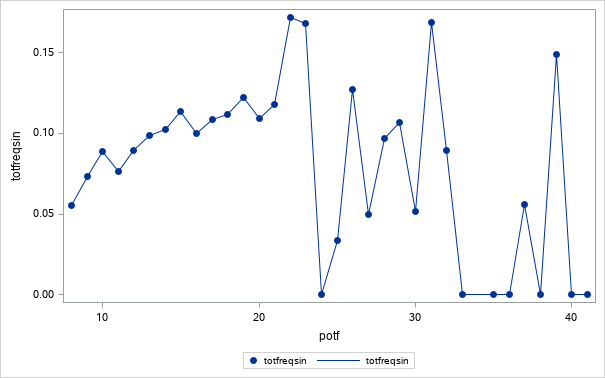

In [32]:
proc sgplot data = polizzebypotf;
    scatter x = potf y = totfreqsin / markerattrs=(symbol=CircleFilled);
    series x = potf y = totfreqsin;
run;

In [33]:
/* Preraggruppamento */
proc format;
    value formatpotf
        low-13 = "8-13"
        14-15 = "14-15"
        16 = "16"
        17-21 = "17-21"
        22-23 = "22-23"
        24-26 = "24-26"
        27-28 = "27-28"
        29-30 = "29-30"
        31-high = "31-";
run;

data polizzebypotf;
    set polizzebypotf;
    levelpotf = potf;
    format levelpotf formatpotf.;
run;

/* Calcolo le informazioni a livello di ogni gruppo */
proc means data = polizzebypotf nway noprint;
    class levelpotf;
    var potf totfreqsin;
    weight totespo;
    output out = polizzebylevelpotf1 mean = potfmed totfreqsinmed;
run;

proc means data = polizzebypotf nway noprint;
    class levelpotf;
    var totespo totnsin totdannotot totnpol;
    output out = polizzebylevelpotf2 sum = totespo totnsin totdannotot totnpol;
run;

data polizzebylevelpotf;
    merge polizzebylevelpotf1 polizzebylevelpotf2;
    by levelpotf;
    drop _type_ _freq_;
run;

/* Standardizzo potf e freqsin in modo da poterle usare assieme per l'accorpamento */
proc standard data = polizzebylevelpotf out = polizzebylevelpotfstd mean = 0 std = 1;
    weight totespo;
    var potfmed totfreqsinmed;
run;

data polizzebylevelpotfstd;
    set polizzebylevelpotfstd;
    format potfmed 8.4;
    format totfreqsinmed 8.4;
run;

data polizzebylevelpotfstd;
    set polizzebylevelpotfstd;
    rename totfreqsinmed = totfreqsinmedstd;
    rename potfmed = potfmedstd;
run;

data polizzebylevelpotf;
    merge polizzebylevelpotf polizzebylevelpotfstd;
    by levelpotf;
run;

proc print data = polizzebylevelpotf;
run;


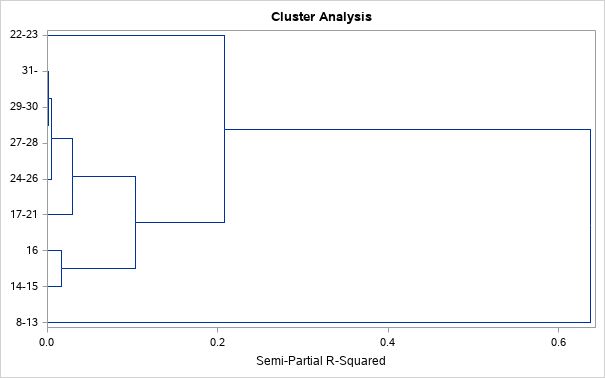

In [34]:
/* Effettuo il clustering usando sia potfmedstd che totfreqsinmedstd */
proc cluster method = ward data = polizzebylevelpotf outtree = clusterpotf;
    id levelpotf;
    var potfmedstd totfreqsinmedstd;
    freq totespo;
    copy totespo totnsin totdannotot potfmed totfreqsinmed;
run;

Con 6 cluster arrivo a $R^2 ≥ 0.99$

In [35]:
proc tree data = clusterpotf nclusters = 6 out = cluster6potf noprint;
    id levelpotf;
    copy totespo totnsin totdannotot potfmed totfreqsinmed;
run;

/* cluster6potf contiene tante righe quanti erano i cluster nel preraggruppamento manuale */
proc print data = cluster9eta;
run;

In [36]:
/* polizzebyclusterpotf contiene una riga per ogni cluster e indica di ogni cluster una serie di informazioni */
proc means data = cluster6potf nway noprint;
    class cluster;
    var totespo totnsin totdannotot;
    output out = polizzebyclusterpotf sum = totespocl totnsincl totdannototcl;
run;

data polizzebyclusterpotf;
    set polizzebyclusterpotf;
    
    totfreqsincl = totnsincl / totespocl;
    if totnsincl > 0 then totdannomedcl = totdannototcl / totnsincl;
        else totdannomedcl = 0;
    totqdcl = totdannototcl / totespocl;
    
    drop _type_;
    
    format totfreqsincl 5.3;
    format totespocl 10.2;
    format totdannototcl 10.2;
    format totqdcl 10.2;
run;

proc print data = polizzebyclusterpotf;
run;

In [37]:
proc sort data = cluster6potf;
    by cluster;
run;

/* Arricchisco il dataset cluster9eta con le informazioni dei cluster a cui ogni gruppo appartiene appartengono */
data cluster6potf;
    merge cluster6potf polizzebyclusterpotf;
    by cluster;
run;

proc print data = cluster6potf;
run;

### `2.4 potkil`

In [38]:
proc means data = polizze nway noprint;
    class potkil;
    var espo nsin dannotot;
    output out = polizzebypotkil sum = totespo totnsin totdannotot;
run;

data polizzebypotkil;
    set polizzebypotkil;
    
    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed = 0;
    totqd = totdannotot / totespo;
        
    drop _TYPE_;
    rename _FREQ_ = totnpol;
run;

proc print data = polizzebypotkil (obs = 10) noobs;
    var potkil totfreqsin totdannomed totqd totespo;
run;


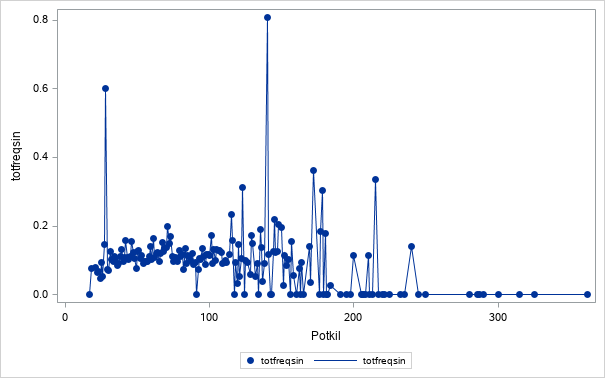

In [39]:
proc sgplot data = polizzebypotkil;
    scatter x = potkil y = totfreqsin / markerattrs=(symbol=CircleFilled);
    series x = potkil y = totfreqsin;
run;

In [40]:
/* Preraggruppamento */
proc format;
    value formatpotkil
        low-26 = "17-26"
        27-33 = "27-33"
        34-39 = "34-39"
        40-49 = "40-49"
        50-57 = "50-57"
        58-65 = "58-65"
        66-78 = "66-78"
        79-92 = "79-92"
        93-108 = "93-108"
        109-123 = "109-123"
        124-139 = "124-139"
        140-143 = "140-143"
        144-150 = "144-150"
        151-high = "151-";
run;

data polizzebypotkil;
    set polizzebypotkil;
    levelpotkil = potkil;
    format levelpotkil formatpotkil.;
run;

/* Calcolo le informazioni a livello di ogni gruppo */
proc means data = polizzebypotkil nway noprint;
    class levelpotkil;
    var potkil totfreqsin;
    weight totespo;
    output out = polizzebylevelpotkil1 mean = potkilmed totfreqsinmed;
run;

proc means data = polizzebypotkil nway noprint;
    class levelpotkil;
    var totespo totnsin totdannotot totnpol;
    output out = polizzebylevelpotkil2 sum = totespo totnsin totdannotot totnpol;
run;

data polizzebylevelpotkil;
    merge polizzebylevelpotkil1 polizzebylevelpotkil2;
    by levelpotkil;
    drop _type_ _freq_;
run;

/* Standardizzo potkil e freqsin in modo da poterle usare assieme per l'accorpamento */
proc standard data = polizzebylevelpotkil out = polizzebylevelpotkilstd mean = 0 std = 1;
    weight totespo;
    var potkilmed totfreqsinmed;
run;

data polizzebylevelpotkilstd;
    set polizzebylevelpotkilstd;;
    format potkilmed 8.4;
    format totfreqsinmed 8.4;
run;

data polizzebylevelpotkilstd;
    set polizzebylevelpotkilstd;
    rename totfreqsinmed = totfreqsinmedstd;
    rename potkilmed = potkilmedstd;
run;

data polizzebylevelpotkil;
    merge polizzebylevelpotkil polizzebylevelpotkilstd;
    by levelpotkil;
run;

proc print data = polizzebylevelpotkil;
run;


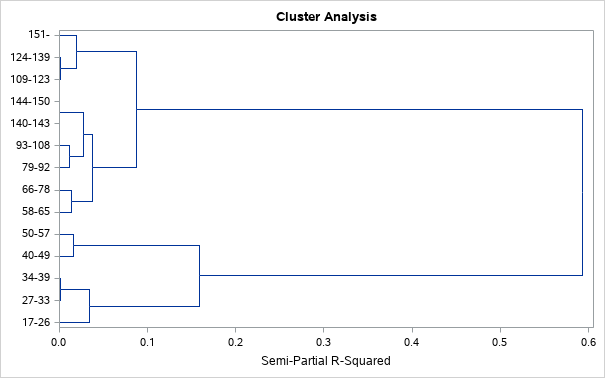

In [41]:
/* Effettuo il clustering usando sia potkilmedstd che totfreqsinmedstd */
proc cluster method = ward data = polizzebylevelpotkil outtree = clusterpotkil;
    id levelpotkil;
    var potkilmedstd totfreqsinmedstd;
    freq totespo;
    copy totespo totnsin totdannotot potkilmed totfreqsinmed;
run;

Con 11 cluster arrivo a $R^2 ≥ 0.99$

In [42]:
proc tree data = clusterpotkil nclusters = 11 out = cluster11potkil noprint;
    id levelpotkil;
    copy totespo totnsin totdannotot potkilmed totfreqsinmed;
run;

/* cluster11potkil contiene tante righe quanti erano i cluster nel preraggruppamento manuale */
proc print data = cluster11potkil;
run;

In [43]:
/* polizzebyclusterpotkil contiene una riga per ogni cluster e indica di ogni cluster una serie di informazioni */
proc means data = cluster11potkil nway noprint;
    class cluster;
    var totespo totnsin totdannotot;
    output out = polizzebyclusterpotkil sum = totespocl totnsincl totdannototcl;
run;

data polizzebyclusterpotkil;
    set polizzebyclusterpotkil;
    
    totfreqsincl = totnsincl/totespocl;
    if totnsincl > 0 then totdannomedcl = totdannototcl / totnsincl;
        else totdannomedcl = 0;
    totqdcl = totdannototcl / totespocl;
    
    drop _type_;
    
    format totfreqsincl 5.3;
    format totespocl 10.2;
    format totdannototcl 10.2;
    format totqdcl 10.2;
run;

proc print data = polizzebyclusterpotkil;
run;

In [44]:
proc sort data = cluster11potkil;
    by cluster;
run;

/* Arricchisco il dataset cluster11potkil con le informazioni dei cluster a cui ogni gruppo appartiene appartengono */
data cluster11potkil;
    merge cluster11potkil polizzebyclusterpotkil;
    by cluster;
run;

proc print data = cluster11potkil;
run;

### `2.5 massa`

In [45]:
proc means data = polizze nway noprint;
    class massa;
    var espo nsin dannotot;
    output out = polizzebymassa sum = totespo totnsin totdannotot;
run;

data polizzebymassa;
    set polizzebymassa;

    totfreqsin = totnsin / totespo;
    if totnsin > 0 then totdannomed = totdannotot / totnsin;
        else totdannomed = 0;
    totqd = totdannotot / totespo;

    drop _TYPE_;
    rename _FREQ_ = totnpol;
run;

proc print data = polizzebymassa (obs = 10) noobs;
    var massa totfreqsin totdannomed totqd totespo;
run;


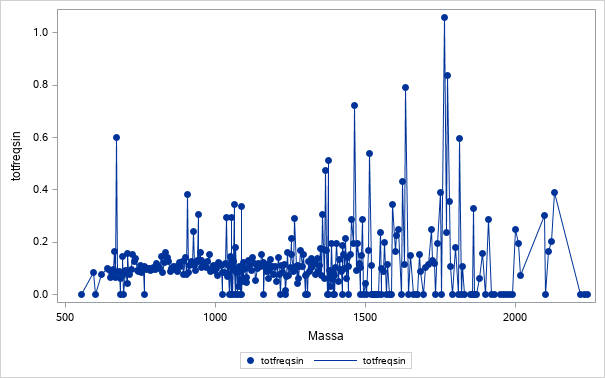

In [46]:
proc sgplot data = polizzebymassa;
    scatter x = massa y = totfreqsin / markerattrs=(symbol=CircleFilled);
    series x = massa y = totfreqsin;
run;

In [47]:
/* Preraggruppamento */
proc format;
    value formatmassa
        low-691 = "555-691"
        692-720 = "692-720"
        721-800 = "721-800"
        801-905 = "801-905"
        906-980 = "906-980"
        981-1030 = "981-1030"
        1031-1094 = "1031-1094"
        1095-1269 = "1095-1269"
        1270-1379 = "1270-1379"
        1380-1424 = "1380-1424"
        1425-1520 = "1425-1520"
        1521-high = "1521-";
run;

data polizzebymassa;
    set polizzebymassa;
    levelmassa = massa;
    format levelmassa formatmassa.;
run;

/* Calcolo le informazioni a livello di ogni gruppo */
proc means data = polizzebymassa nway noprint;
    class levelmassa;
    var massa totfreqsin;
    weight totespo;
    output out = polizzebylevelmassa1 mean = massamed totfreqsinmed;
run;

proc means data = polizzebymassa nway noprint;
    class levelmassa;
    var totespo totnsin totdannotot totnpol;
    output out = polizzebylevelmassa2 sum = totespo totnsin totdannotot totnpol;
run;

data polizzebylevelmassa;
    merge polizzebylevelmassa1 polizzebylevelmassa2;
    by levelmassa;
    drop _type_ _freq_;
run;

/* Standardizzo massa e freqsin in modo da poterle usare assieme per l'accorpamento */
proc standard data = polizzebylevelmassa out = polizzebylevelmassastd mean = 0 std = 1;
    weight totespo;
    var massamed totfreqsinmed;
run;

data polizzebylevelmassastd;
    set polizzebylevelmassastd;
    rename totfreqsinmed = totfreqsinmedstd;
    rename massamed = massamedstd;
run;

data polizzebylevelmassa;
    merge polizzebylevelmassa polizzebylevelmassastd;
    by levelmassa;
run;

proc print data = polizzebylevelmassastd;
run;


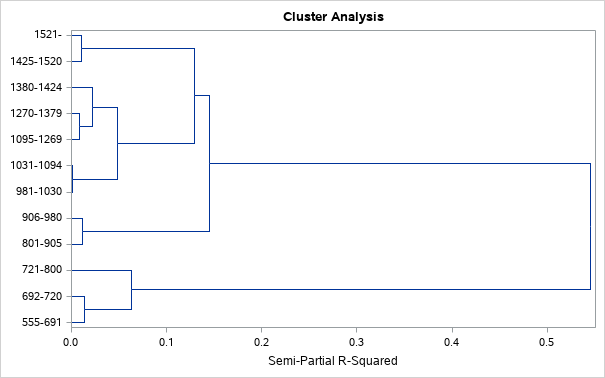

In [48]:
/* Effettuo il clustering usando sia massamedstd che totfreqsinmedstd */
proc cluster method = ward data = polizzebylevelmassa outtree = clustermassa;
    id levelmassa;
    var massamedstd totfreqsinmedstd;
    freq totespo;
    copy totespo totnsin totdannotot massamed totfreqsinmed;
run;

Con 10 cluster arrivo a $R^2 ≥ 0.99$

In [49]:
proc tree data = clustermassa nclusters = 10 out = cluster10massa noprint;
    id levelmassa;
    copy totespo totnsin totdannotot massamed totfreqsinmed;
run;

/* cluster10massa contiene tante righe quanti erano i cluster nel preraggruppamento manuale */
proc print data = cluster10massa;
run;

In [50]:
/* polizzebyclustereta contiene una riga per ogni cluster e indica di ogni cluster una serie di informazioni */
proc means data = cluster10massa nway noprint;
    class cluster;
    var totespo totnsin totdannotot;
    output out = polizzebyclustermassa sum = totespocl totnsincl totdannototcl;
run;

data polizzebyclustermassa;
    set polizzebyclustermassa;
    
    totfreqsincl = totnsincl / totespocl;
    if totnsincl > 0 then totdannomedcl = totdannototcl / totnsincl;
        else totdannomedcl = 0;
    totqdcl = totdannototcl / totespocl;   
        
    drop _type_;
    
    format totfreqsincl 5.3;
    format totespocl 10.2;
    format totdannototcl 10.2;
    format totqdcl 10.2;
run;

proc print data = polizzebyclustermassa;
run;

In [51]:
proc sort data = cluster10massa;
    by cluster;
run;

/* Arricchisco il dataset cluster9eta con le informazioni dei cluster a cui ogni gruppo appartiene appartengono */
data cluster10massa;
    merge cluster10massa polizzebyclustermassa;
    by cluster;
run;

proc print data = cluster10massa;
run;

### Assegnazione formati

In [52]:
/* prov */
proc format;
    value $classprov
        "RC","VT","CN","OR","RA","VC","FE","LC","SS","VV","BZ","PV","RG","CH","PG","AR","TE","TN","VR" = "prov1"
        "BN","PO","IM","BA" = "prov2"
        "EN","NO","SV","VI","MC","MT","RE","BS","RI","AG","AV","PC" = "prov3"
        "AL","SO","GO","LT","PR","PN","GR","UD","TV","PD" = "prov4"
        "SI","TR","AP","LO","FG","ME","LU","CZ","FR","CT","VE","BG","IS","MO","TP" = "prov5"
        "CL","PI","VA","BR","FO","LI","SR","CO","SA" = "prov6"
        "LE","RN","AN","MS","BO","GE","TS" = "prov7"
        "CB","FI","NU","PE","TO","MI" = "prov8"
        "PT","TA","SP","CA","ROMA","PA" = "prov9"
        "BL","PZ","BI","CR","CS","AT","MN","PS" = "prov10"
        "AO","NA","CE","KR" = "prov11"
        "AQ","RSM","VB","RO" = "prov12";
run;

/* eta */
proc format;
    value classeta
        low-22 = "18-22"
        23-26 = "23-26"
        27-30 = "27-30"
        31-34 = "31-34"
        35-43 = "35-43"
        44-51 = "44-51"
        52-60 = "52-60"
        61-69 = "61-69"
        70-high = "70-";
run;

/* potf */
proc format;
    value classpotf
        low-13 = "8-13"
        14-15 = "14-15"
        16 = "16"
        17-21 = "17-21"
        22-23 = "22-23"
        24-26 = "24-26"
        27-28 = "27-28"
        29-30 = "29-30"
        31-high = "31-";
run;

/* potkil */
proc format;
    value classpotkil
        low-26 = "17-26"
        27-33 = "27-33"
        34-39 = "34-39"
        40-49 = "40-49"
        50-57 = "50-57"
        58-65 = "58-65"
        66-78 = "66-78"
        79-92 = "79-92"
        93-108 = "93-108"
        109-123 = "109-123"
        124-139 = "124-139"
        140-143 = "140-143"
        144-150 = "144-150"
        151-high = "151-";
run;

/* massa */
proc format;
    value classmassa
        low-691 = "555-691"
        692-720 = "692-720"
        721-800 = "721-800"
        801-905 = "801-905"
        906-980 = "906-980"
        981-1030 = "981-1030"
        1031-1094 = "1031-1094"
        1095-1269 = "1095-1269"
        1270-1379 = "1270-1379"
        1380-1424 = "1380-1424"
        1425-1520 = "1425-1520"
        1521-high = "1521-";
run;

/* Assegno i formati */
data polizze;
    set polizze;
    
    format prov $classprov.;
    format eta classeta.;
    format potf classpotf.;
    format potkil classpotkil.;
    format massa classmassa.;
run;

proc print data = polizze (obs = 10);
run;

### Frequenza sinistri nei cluster


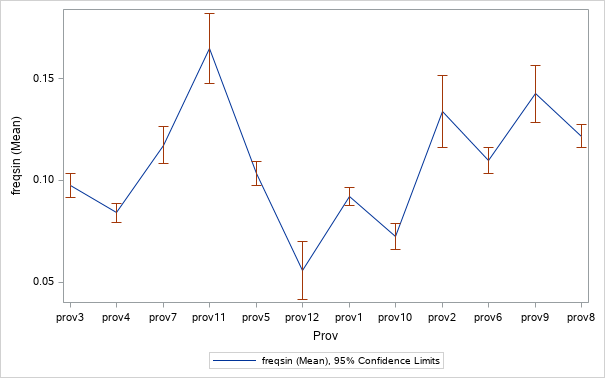

In [53]:
/* prov */
proc sgplot data=polizze;
    vline prov / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
run;


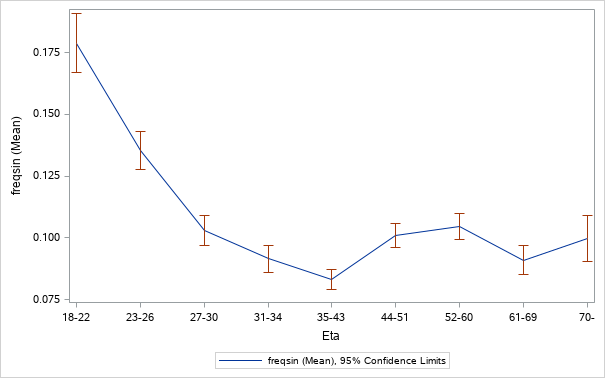

In [54]:
/* eta */
proc sgplot data=polizze;
    vline eta / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
run;


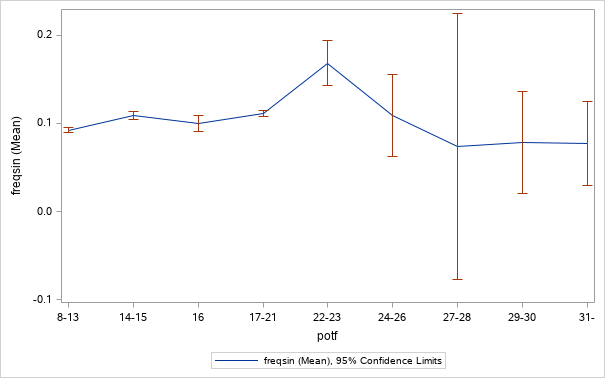

In [55]:
/* potf */
proc sgplot data=polizze;
    vline potf / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
run;


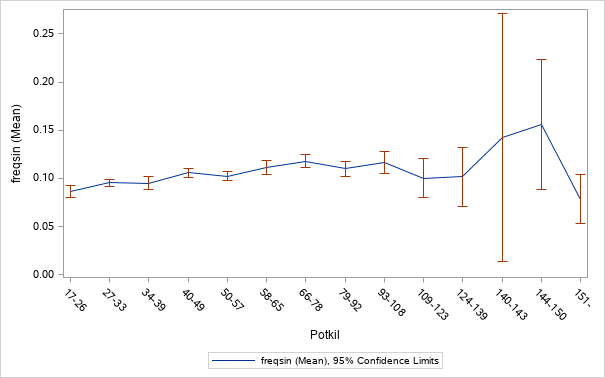

In [56]:
/* potkil */
proc sgplot data=polizze;
    vline potkil / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
run;


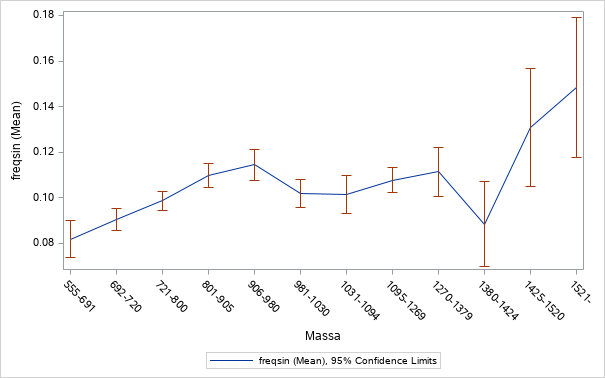

In [57]:
/* massa */
proc sgplot data=polizze;
    vline massa / response=freqsin weight=espo stat=mean limitstat=clm alpha = .05;
run;

## 3) Tariffazione con i GLM

### 3.A.1 Modelli per il numero di sinistri

#### Preparazione dei dati

In [58]:
/* Dataset per modelli con dati individuali */
data polizze;
    set polizze;
    lnespo = log(espo);
    freqsin = nsin / espo;
run;


/* Dataset per modelli con dati raggruppati */
proc means data = polizze nway noprint;
    class sesso capoluogo bendie prov eta potf potkil massa;
    var espo nsin dannotot;
    output out = polizzecum sum = espocum nsincum dannototcum;
run;

data polizzecum;
    set polizzecum;
    lnespocum = log(espocum);
    freqsincum = nsincum / espocum;
run;

proc print data = polizzecum (obs = 10);
run;

In [59]:
/* Il dataset polizzecum ha 26 249 righe */
proc summary data = polizzecum;
    output out = conta_righe;
run;

proc print data = conta_righe;
run;

#### 3.A.1.1 Modello di Poisson

In [60]:
/* Dati individuali, eta */
proc genmod data = polizze;
    class eta(ref='35-43');
    model nsin = eta /
        dist = poisson
        offset = lnespo
        type3;
run;

In [61]:
/* Dati raggruppati, eta */
proc genmod data = polizzecum;
    class eta(ref='35-43');
    model nsincum = eta /
        dist = poisson
        offset = lnespocum
        type3;
run;

In [62]:
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78');
    model nsincum = eta potkil /
        dist = poisson
        offset = lnespocum
        type3;
run;

In [63]:
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78') massa(ref='906-980');
    model nsincum = eta potkil massa /
        dist = poisson
        offset = lnespocum
        type3;
run;

In [64]:
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78') massa(ref='906-980') potf;
    model nsincum = eta potkil massa potf/
        dist = poisson
        offset = lnespocum
        type3;
run;

In [65]:
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78') massa(ref='906-980') bendie;
    model nsincum = eta potkil massa bendie /
        dist = poisson
        offset = lnespocum
        type3;
run;

In [66]:
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78') massa(ref='906-980') bendie sesso;
    model nsincum = eta potkil massa bendie sesso /
        dist = poisson
        offset = lnespocum
        type3;
run;

In [67]:
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78') massa(ref='906-980') bendie capoluogo;
    model nsincum = eta potkil massa bendie capoluogo /
        dist = poisson
        offset = lnespocum
        type3;
run;

In [68]:
/* Accorpamento classi */

/* eta */
/* Accetti H0 - > Sì accorpamenti */
ods select contrasts;
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78') massa(ref='906-980') bendie capoluogo prov(ref='prov1');
    model nsincum = eta potkil massa bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        type3;
    contrast "eta 61-" eta 0  0  0  0  0  0  1 -1  0;
run;

In [69]:
/* potkil */
/* Accetto H0 -> Sì accorpamenti */
ods select contrasts;
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78') massa(ref='906-980') bendie capoluogo prov(ref='prov1');
    model nsincum = eta potkil massa bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        type3;
    contrast "potkil" potkil 1 -1  0  0  0  0  0  0  0  0  0  0  0  0,
                      potkil 0  1 -1  0  0  0  0  0  0  0  0  0  0  0,
                      potkil 0  0  1 -1  0  0  0  0  0  0  0  0  0  0,
                      potkil 0  0  0  1 -1  0  0  0  0  0  0  0  0  0;
run;

In [70]:
/* massa */
/* Accetto H0 -> Sì accorpamenti */
ods select contrasts;
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil(ref='66-78') massa(ref='906-980') bendie capoluogo prov(ref='prov1');
    model nsincum = eta potkil massa bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        type3;
    contrast "massa" massa  0  0  0  0  0  0  1 -1  0  0  0  0,
                     massa  0  0  0  0  0  0  0  1 -1  0  0  0,
                     massa  0  0  0  0  0  0  0  0  1 -1  0  0,
                     massa  0  0  0  0  0  0  0  0  0  0  1 -1;
run;

In [71]:
/* Faccio gli accorpamenti */

/* eta */
proc format;
    value classeta
        low-22 = "18-22"
        23-26 = "23-26"
        27-30 = "27-30"
        31-34 = "31-34"
        35-43 = "35-43"
        44-51 = "44-51"
        52-60 = "52-60"
        61-high = "61-";
run;

/* potkil */
proc format;
    value classpotkil
        low-57 = "-57"
        58-high = "58-";
run;

/* massa */
proc format;
    value classmassa
        low-1030 = "-1030"
        1031-1379 = "1031-1379"
        1380-1424 = "1380-1424"
        1425-high = "1425-";
run;

/* Il format si aggiorna in automatico nel dataset */
proc print data = polizze (obs = 10);
run;

In [72]:
/* modello con livelli accorpati */
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil massa bendie capoluogo prov(ref='prov1');
    model nsincum = eta potkil massa bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        type3; 
run;

In [73]:
/* rimuovo massa */
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil bendie capoluogo prov(ref='prov1');
    model nsincum = eta potkil bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        type3; 
run;

In [74]:
/* Province */
/* Accetto H0 -> Accorpo i livelli */
ods select contrasts;
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil massa bendie capoluogo prov(ref='prov1');
    model nsincum = eta potkil massa bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        type3;
    contrast "province" prov 1  0 -1  0  0  0  0  0  0  0  0  0, /* prov10-prov12 */
                        prov 0  0  0  1  0  0  0  0  0  0 -1  0, /* prov2-prov9 */
                        prov 0  0  0  0  1  0  0  0  0  0  0 -1; /* prov1-prov3 */
run;

In [75]:
/* Accorpo le province */
/* prov */
proc format;
    value $classprov
        "RC","VT","CN","OR","RA","VC","FE","LC","SS","VV","BZ","PV","RG","CH","PG","AR","TE","TN","VR","EN","NO","SV","VI","MC","MT","RE","BS","RI","AG","AV","PC" = "prov1-3"
        "BN","PO","IM","BA","PT","TA","SP","CA","ROMA","PA" = "prov2-9"
        "AL","SO","GO","LT","PR","PN","GR","UD","TV","PD" = "prov4"
        "SI","TR","AP","LO","FG","ME","LU","CZ","FR","CT","VE","BG","IS","MO","TP" = "prov5"
        "CL","PI","VA","BR","FO","LI","SR","CO","SA" = "prov6"
        "LE","RN","AN","MS","BO","GE","TS" = "prov7"
        "CB","FI","NU","PE","TO","MI" = "prov8"
        "BL","PZ","BI","CR","CS","AT","MN","PS","AQ","RSM","VB","RO" = "prov10-12"
        "AO","NA","CE","KR" = "prov11";
run;

proc print data = polizze (obs = 10);
run;


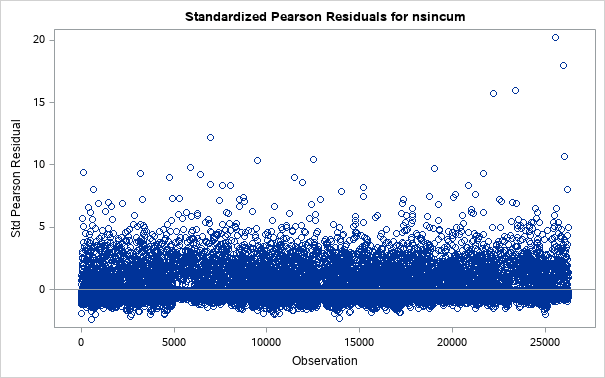

In [76]:
/* Modello di Poisson definitivo */
proc genmod data = polizzecum plots = stdreschi;
    class eta(ref='35-43') potkil bendie capoluogo prov(ref='prov1-3');
    model nsincum = eta potkil bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        type3;
run;


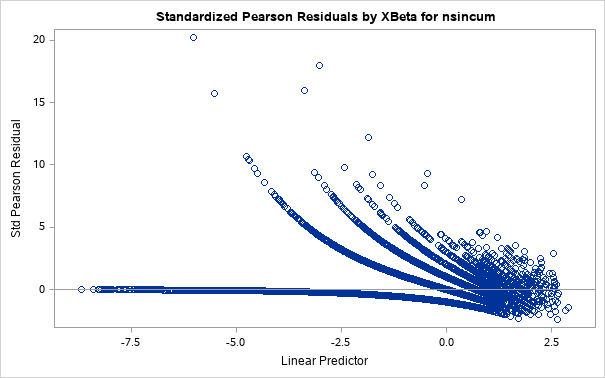

In [77]:
/* Modello di Poisson definitivo */
proc genmod data = polizzecum plots = stdreschi(xbeta);
    class eta(ref='35-43') potkil bendie capoluogo prov(ref='prov1-3');
    model nsincum = eta potkil bendie capoluogo prov /
        dist = poisson
        offset = lnespocum;
run;

#### 3.A.1.2 Modello di Poisson con sovradispersione

In [78]:
/* Modello con dati raggruppati */
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil bendie capoluogo prov(ref='prov1-3');
    model nsincum = eta potkil bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        scale = pearson
        type3;
run;

In [79]:
/* Modello con dati raggruppati */
/* Accorpo ulteriormente i livelli di eta */
ods select contrasts;
proc genmod data = polizzecum;
    class eta(ref='35-43') potkil bendie capoluogo prov(ref='prov1-3');
    model nsincum = eta potkil bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        scale = pearson
        type3;
    contrast "eta" eta 0  0  0  1  0  0  0 -1; /* 31-34 con 35-43 */
                   /*eta 0  0  0  0  1 -1  0  0,*/ /* 44-51 con 52-60 */
                   /*eta 0  0  0  0  0  1 -1  0;*/ /* 52-60 con 61- */
run;

In [80]:
/* Accorpo i livelli di eta */

/* eta */
proc format;
    value classeta
        low-22 = "18-22"
        23-26 = "23-26"
        27-30 = "27-30"
        31-43 = "31-43"
        44-51 = "44-51"
        52-60 = "52-60"
        61-high = "61-";
run;

proc print data = polizze (obs = 10);
run;


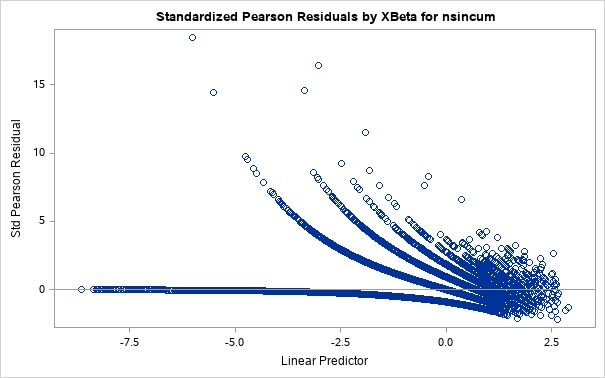

In [81]:
/* Modello di Poisson con sovradispersione definitivo */
proc genmod data = polizzecum plots = stdreschi(xbeta);
    class eta(ref='31-43') potkil bendie capoluogo prov(ref='prov1-3');
    model nsincum = eta potkil bendie capoluogo prov /
        dist = poisson
        offset = lnespocum
        scale = pearson
        type3;
run;

#### 3.A.1.3 Modello Binomiale Negativa

In [82]:
proc print data = polizze (obs = 10);
run;

In [83]:
/* Stima preliminare di alpha */
/*ods exclude all;*/ /* Non stampo nell'output i risultati della proc genmod */
ods select ModelInfo;
proc genmod data = polizze;
    output out = stime pred = nsinatt;
    class eta(ref='31-43') potkil bendie capoluogo prov(ref='prov1-3');
    model nsin = eta potkil bendie capoluogo prov /
        dist = poisson
        offset = lnespo;
run;
/*ods exclude none;*/

In [84]:
proc print data = stime (obs = 10);
run;

In [85]:
/* Stimatore di Cameron Trivedi */
/* Stimatore di Pinquet */
data alpha_dataset;
    set stime;
    
    /* Stimatore di Cameron Trievedi */
    add = ((nsin - nsinatt)**2 - nsinatt) / nsinatt**2;
    
    /* Stimatore di Pinquet */
    alphanum = nsinatt**2;
    alphaden = (nsin - nsinatt)**2 - nsinatt;
    
    keep nsincum nsinatt add alphanum alphaden;
run;

proc means data = alpha_dataset;
    var add alphanum alphaden;
    output out = alpha_sum sum = sadd salphanum salphaden;
run;

proc print data = alpha_sum (obs = 10);
run;

In [86]:
data alpha;
    set alpha_sum;
    
    /* Cameron Trivedi */
    alpha_ct = (sadd / (_FREQ_ - 17))**(-1);
    
    /* Pinquet */
    alpha_pinquet = salphanum / salphaden;
    
    keep alpha_ct alpha_pinquet;
run;

proc print data = alpha noobs;
run;


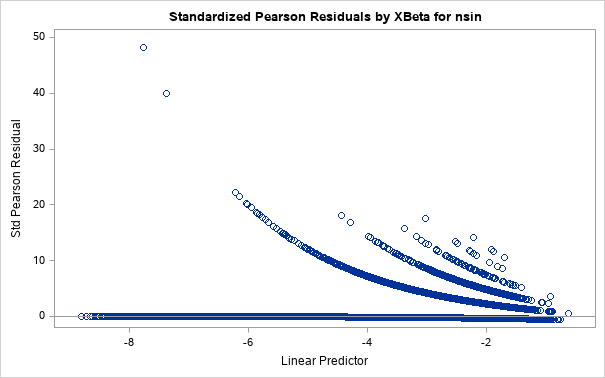

In [87]:
/* Modello Binomiale Negativa con alpha stimato tramite lo stimatore di Pinquet */
proc genmod data = polizze plots = stdreschi(xbeta);
    class eta(ref='31-43') potkil bendie capoluogo prov(ref='prov1-3');
    
    alpha = 1.26892;
    mu = _MEAN_;
    y = _RESP_;
    
    variance var = mu + mu**2 / alpha;
    
    if y > 0 then
        d = 2 * (y * log(y / mu) - (alpha + y) * log((alpha + y) / (alpha + mu)));
    else if y = 0 then
        d = 2 * alpha * log(1 + mu / alpha);
    
    deviance dev = d;
    
    model nsin = eta potkil bendie capoluogo prov /
        link = log
        offset = lnespo;
run;


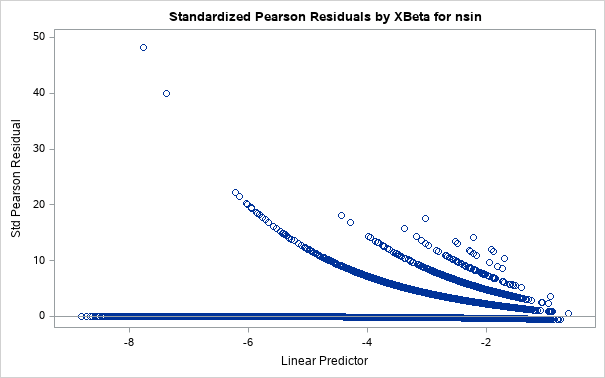

In [88]:
/* Modello Binomiale Negativa con alpha stimato tramite la massima verosimiglianza */
proc genmod data = polizze plots = stdreschi(xbeta);
    class eta(ref='31-43') potkil bendie capoluogo prov(ref='prov1-3');
      
    model nsin = eta potkil bendie capoluogo prov /
        dist = negbin
        link = log
        offset = lnespo;
run;

### 3.A.2 Modelli per il danno per sinistro

#### Preparazione dei dati

In [89]:
data danni;
    set dati.danni;
run;

proc print data = danni (obs = 10);
run;

In [90]:
/* Applico la partizione in livelli definita precedentemente */
data danni;
    set danni;
    format prov $classprov.;
    format eta classeta.;
    format potf classpotf.;
    format potkil classpotkil.;
    format massa classmassa.;
run;

proc print data = danni (obs = 10);
run;

In [91]:
/* Dataset per modelli con dati raggruppati */
proc means data = danni nway noprint;
    class sesso capoluogo bendie prov eta potf potkil massa;
    var danno;
    output out = dannicum sum = dannocum;
run;

data dannicum;
    set dannicum;
    dannocummed = dannocum / _FREQ_;
    
    rename _FREQ_ = nsin;
    drop _TYPE_;
run;

proc print data = dannicum (obs = 10);
run;

In [92]:
/* Il dataset dannicum ha 2 249 righe */
proc summary data = dannicum;
    output out = conta_righe;
run;

proc print data = conta_righe;
run;

#### 3.A.2.1 Modello Gamma

In [93]:
/* Modello con dati individuali */
proc genmod data = danni;
    class eta(ref='31-43') potkil bendie capoluogo prov(ref='prov1-3');
    model danno = eta potkil bendie capoluogo prov /
        dist = gamma
        link = log
        type3;
run;

In [94]:
/* Modello con dati raggruppati */
proc genmod data = dannicum;
    class eta(ref='31-43') potkil bendie capoluogo prov(ref='prov1-3');
    model dannocummed = eta potkil bendie capoluogo prov /
        dist = gamma
        link = log
        type3;
    weight nsin;
run;

In [95]:
/* Testo accorpamenti eta */
ods select contrasts;
proc genmod data = dannicum;
    class eta(ref='31-43') potkil bendie capoluogo prov(ref='prov1-3');
    model dannocummed = eta potkil bendie capoluogo prov /
        dist = gamma
        link = log
        type3;
    weight nsin;
    contrast "eta" eta  1 -1  0  0  0  0  0, /* 18-22 con 23-26 */
                   eta  0  0  1  0  0  0 -1, /* 27-30 con 31-43 */
                   eta  0  0  0  1 -1  0  0, /* 44-51 con 52-60 */
                   eta  0  0  0  0  1 -1  0; /* 52-60 con 61- */
                   
run;

In [96]:
/* Ulteriori accorpamenti di variabili */
/* eta */
proc format;
    value classeta
        low-26 = "18-26"
        27-43 = "27-43"
        44-high = "44-";
run;

proc print data = polizze (obs = 10);
run;

In [97]:
proc genmod data = dannicum;
    class eta(ref='27-43') potkil bendie capoluogo prov(ref='prov1-3');
    model dannocummed = eta potkil bendie capoluogo prov /
        dist = gamma
        link = log
        type3;
    weight nsin;   
run;

In [98]:
/* Test per accorpamenti province */
ods select contrasts;
proc genmod data = dannicum;
    class eta(ref='27-43') potkil bendie capoluogo prov(ref='prov1-3');
    model dannocummed = eta potkil bendie capoluogo prov /
        dist = gamma
        link = log;
    weight nsin;
    contrasts "province" prov  0  0  0  0  0  0  1  0 -1, /* prov8 con prov1-3 */
                         prov  0  0  0  0  0  0  0  1 -1, /* prov7 con prov1-3 */
                         prov  0  0  0  1 -1  0  0  0  0, /* prov4 con prov5 */
                         prov  1  0  0  0  0 -1  0  0  0, /* prov6 con prov10-12 */
                         prov  0  1 -1  0  0  0  0  0  0; /* prov11 con prov2-9 */
run;

In [99]:
/* prov */
proc format;
    value $classprov
        "RC","VT","CN","OR","RA","VC","FE","LC","SS","VV","BZ","PV","RG","CH","PG","AR","TE","TN","VR","EN","NO","SV","VI","MC","MT","RE","BS","RI","AG","AV","PC","LE","RN","AN","MS","BO","GE","TS","CB","FI","NU","PE","TO","MI" = "prov1-3-7-8"
        "BN","PO","IM","BA","PT","TA","SP","CA","ROMA","PA","AO","NA","CE","KR" = "prov2-9-11"
        "AL","SO","GO","LT","PR","PN","GR","UD","TV","PD","SI","TR","AP","LO","FG","ME","LU","CZ","FR","CT","VE","BG","IS","MO","TP" = "prov4-5"
        "CL","PI","VA","BR","FO","LI","SR","CO","SA","BL","PZ","BI","CR","CS","AT","MN","PS","AQ","RSM","VB","RO" = "prov6-10-12"
run;

proc print data = polizze (obs = 10);
run;


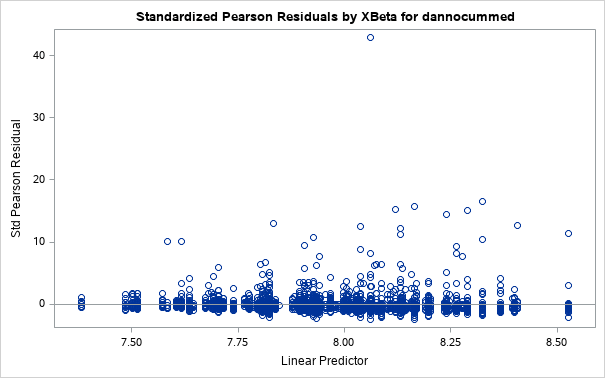

In [100]:
proc genmod data = dannicum plots = stdreschi(xbeta);
    class eta(ref='27-43') potkil bendie capoluogo prov(ref='prov1-3-7-8');
    model dannocummed = eta potkil bendie capoluogo prov /
        dist = gamma
        link = log
        type3;
    weight nsin;   
run;

## 4) Riservazione con i GLM

### Preparazione dei dati

In [101]:
data runoff;
    set dati.runoff;
run;

proc print data = runoff (obs = 10);
run;

In [102]:
/*
Riporto:
- pagamentinden: pagamenti incrementali in rapporto al numero di sinistri denunciati
- logpagamenti: logaritmo dei pagamenti
*/
data runoff1;
    set runoff;
    pagamentinden = pagamenti / nden;
    logpagamenti = log(pagamenti);
run;

proc print data = runoff1 (obs = 10);
run;

### Modello Poisson-Logaritmo

* Variabili risposta: $Y_i = P_{ij}$ (`pagamenti`), con distribuzione di **Poisson**;
* Variabili esplicative: $i$ (`annoacc`) e $j$ (`annodiff`), di classificazione $\eta_{ij}=\boldsymbol{x}'\beta = \mu + \alpha_i + \beta_j$ ;
* Funzione di collegamento: $g=log$.

In [103]:
proc genmod data = runoff1;
    class annoacc (ref = first) annodiff (ref = first);
    model pagamenti = annoacc annodiff /
        dist = poisson
        link = log
        type3;
run;

### Modello Gamma-Logaritmo

* Variabili risposta: $Y_i = P_{ij}$ (`pagamenti`), con distribuzione **gamma**;
* Variabili esplicative: $i$ (`annoacc`) e $j$ (`annodiff`), di classificazione $\eta_{ij}=\boldsymbol{x}'\beta = \mu + \alpha_i + \beta_j$ ;
* Funzione di collegamento: $g=log$.

In [104]:
proc genmod data = runoff1;
    class annoacc (ref = first) annodiff (ref = first);
    model pagamenti = annoacc annodiff /
        dist = gamma
        link = log
        scale = pearson
        type3;
run;

### Modello di Poisson con Sovradispersione-Logaritmo

* Variabili risposta: $Y_i = P_{ij}$ (`pagamenti`), **Poisson con Sovradispersione**;
* Variabili esplicative: $i$ (`annoacc`) e $j$ (`annodiff`), di classificazione $\eta_{ij}=\boldsymbol{x}'\beta = \mu + \alpha_i + \beta_j$ ;
* Funzione di collegamento: $g=log$.

In [105]:
proc genmod data = runoff1;
    class annoacc (ref = first) annodiff (ref = first);
    model pagamenti = annoacc annodiff /
        dist = poisson
        link = log
        scale = pearson
        type3;
run;

### Modello di Poisson con Sovradispersione-Logaritmo per pagamenti rapportati a una misura di esposizione

* Variabili risposta: $Y_{ij} = \frac{P_{ij}}{w_{i}}$ pagamenti rapportati al numero di sinistri dell'anno $i$ denunciati nell’anno di accadimento $w_i$, **Poisson con Sovradispersione**, con pesi i numeri di sinistri dell'anno $i$ denunciati nell’anno di accadimento $\omega_i = w_i$;
* Variabili esplicative: $i$ (`annoacc`) e $j$ (`annodiff`), di classificazione $\eta_{ij}=\boldsymbol{x}'\beta = \mu + \alpha_i + \beta_j$ ;
* Funzione di collegamento: $g=log$.

In [106]:
proc genmod data = runoff1;
    class annoacc (ref = first) annodiff (ref = first);
    model pagamentinden = annoacc annodiff /
        dist = poisson
        link = log
        scale = pearson
        type3;
    weight nden;
run;

### Modello di Poisson-Composto-Logaritmo per pagamenti rapportati a una misura di esposizione

* Variabili risposta: $Y_{ij} = \frac{P_{ij}}{w_{i}}$ pagamenti rapportati al numero di sinistri dell'anno $i$ denunciati nell’anno di accadimento $w_i$, **Poisson-Composta**, con pesi i numeri di sinistri dell'anno $i$ denunciati nell’anno di accadimento $\omega_i = w_i$;
* Variabili esplicative: $i$ (`annoacc`) e $j$ (`annodiff`), di classificazione $\eta_{ij}=\boldsymbol{x}'\beta = \mu + \alpha_i + \beta_j$ ;
* Funzione di collegamento: $g=log$.

In [107]:
proc genmod data = runoff1;
    class annoacc (ref = first) annodiff (ref = first);
    
    csi = 1.01887;
    y = _RESP_;
    mu = _MEAN_;
    
    variance var = mu*csi;
    
    if y = 0 then
        d = 2 * mu**(2 - csi) / (2 - csi);
    else
        d = -2 * (y * (mu**(1 - csi) - y**(1 - csi)) / (1 - csi) - (mu**(2 - csi) - y**(2 - csi)) / (2 - csi));
    
    deviance dev = d;
    
    model pagamentinden = annoacc annodiff /
        link = log
        scale = pearson
        type3;

    weight nden;
run;

### Modello di Poisson con Sovradispersione-Logaritmo per pagamenti rapportati a una misura di esposizione

* Variabili risposta: $Y_{ij} = \frac{P_{ij}}{w_{i}}$ pagamenti rapportati al numero di sinistri dell'anno $i$ denunciati nell’anno di accadimento $w_i$, **Poisson con Sovradispersione**, con pesi i numeri di sinistri dell'anno $i$ denunciati nell’anno di accadimento $\omega_i = w_i$;
* Variabili esplicative: $i$ (`annoacc`), $j$ (`annodiff`) e $i+j$ (`annopag`), di classificazione $\eta_{ij}=\boldsymbol{x}'\beta = \mu + \alpha_i + \beta_j + \gamma_{i+j}$ ;
* Funzione di collegamento: $g=log$.

In [108]:
proc genmod data = runoff1;
    class annoacc (ref = first) annodiff (ref = first) annopag;
    model pagamentinden = annoacc annodiff annopag /
        dist = poisson
        link = log
        scale = pearson
        type3;
    weight nden;
run;